<a href="https://colab.research.google.com/github/McgregoryPinto/POS-FIAP/blob/main/hdtt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro titulo

In [1]:
import numpy as np

# Leitura do arquivo hdtt4note.txt
def read_hdtt4note(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    # Extraindo os valores dos parâmetros
    num_teachers = int(data[0].split('=')[-1].strip())
    num_subjects = int(data[1].split('=')[-1].strip())
    num_classes = int(data[2].split('=')[-1].strip())
    num_rooms = int(data[3].split('=')[-1].strip())
    num_requirements = int(data[4].split('=')[-1].strip())
    return num_teachers, num_subjects, num_classes, num_rooms, num_requirements

# Leitura do arquivo hdtt4req.txt
def read_hdtt4req(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    requirements_matrix = []
    for line in data:
        requirements_matrix.append([int(x) for x in line.split()])
    return np.array(requirements_matrix)

# Caminhos dos arquivos (ajuste conforme necessário)
note_file_path = "/content/drive/MyDrive/hdtt/hdtt4note.txt"
req_file_path = "/content/drive/MyDrive/hdtt/hdtt4req.txt"

# Leitura dos arquivos
num_teachers, num_subjects, num_classes, num_rooms, num_requirements = read_hdtt4note(note_file_path)
requirements_matrix = read_hdtt4req(req_file_path)

# Impressão para verificação
print("Número de Professores:", num_teachers)
print("Número de Disciplinas:", num_subjects)
print("Número de Turmas:", num_classes)
print("Número de Salas:", num_rooms)
print("Número de Requisitos:", num_requirements)
print("\nMatriz de Requisitos:")
print(requirements_matrix)


Número de Professores: 4
Número de Disciplinas: 20
Número de Turmas: 4
Número de Salas: 4
Número de Requisitos: 120

Matriz de Requisitos:
[[2 2 1 2]
 [1 1 1 2]
 [1 1 1 6]
 [2 2 3 2]
 [2 5 1 2]
 [0 4 3 2]
 [1 2 1 0]
 [2 2 1 2]
 [2 1 1 2]
 [0 0 5 1]
 [2 1 4 1]
 [6 1 2 1]
 [3 1 2 1]
 [1 4 1 4]
 [3 3 2 1]
 [2 0 1 1]]


In [2]:
import random

# Definindo os parâmetros do problema (do hdtt4note.txt)
num_teachers = 4
num_subjects = 20
num_classes = 4
num_rooms = 4
num_requirements = 120
num_periods = 10  # Número de períodos disponíveis (supondo 10 períodos)

# Representando um indivíduo (solução) aleatória
def create_random_individual():
    individual = []
    for _ in range(num_requirements):
        turma = random.randint(0, num_classes - 1)
        professor = random.randint(0, num_teachers - 1)
        sala = random.randint(0, num_rooms - 1)
        periodo = random.randint(0, num_periods - 1)
        individual.append([turma, professor, sala, periodo])
    return individual

# Função de Fitness para avaliar o indivíduo
def calculate_fitness(individual, requirements_matrix):
    score = 0
    conflicts = 0

    # Validar se os requisitos são atendidos
    for i in range(len(requirements_matrix)):
        turma = i // num_rooms
        sala = i % num_rooms
        for professor in range(num_teachers):
            expected_meetings = requirements_matrix[i][professor]
            if expected_meetings > 0:
                # Contar o número de alocações no indivíduo
                actual_meetings = sum(1 for x in individual if x[0] == turma and x[1] == professor and x[2] == sala)
                # Penalizar se o número de alocações não for igual ao esperado
                if actual_meetings == expected_meetings:
                    score += 1
                else:
                    conflicts += abs(expected_meetings - actual_meetings)

    # Fitness é uma função que tentará maximizar o score e minimizar conflitos
    fitness = score - conflicts
    return fitness

# Criação de uma população inicial aleatória
population_size = 50
population = [create_random_individual() for _ in range(population_size)]

# Calculando o fitness dos indivíduos na população inicial
fitness_scores = [calculate_fitness(individual, requirements_matrix) for individual in population]

# Imprimindo fitness inicial dos indivíduos
for i, fitness in enumerate(fitness_scores):
    print(f"Indivíduo {i + 1} - Fitness: {fitness}")


Indivíduo 1 - Fitness: -73
Indivíduo 2 - Fitness: -60
Indivíduo 3 - Fitness: -60
Indivíduo 4 - Fitness: -79
Indivíduo 5 - Fitness: -70
Indivíduo 6 - Fitness: -38
Indivíduo 7 - Fitness: -62
Indivíduo 8 - Fitness: -59
Indivíduo 9 - Fitness: -64
Indivíduo 10 - Fitness: -49
Indivíduo 11 - Fitness: -76
Indivíduo 12 - Fitness: -60
Indivíduo 13 - Fitness: -50
Indivíduo 14 - Fitness: -82
Indivíduo 15 - Fitness: -63
Indivíduo 16 - Fitness: -73
Indivíduo 17 - Fitness: -87
Indivíduo 18 - Fitness: -70
Indivíduo 19 - Fitness: -51
Indivíduo 20 - Fitness: -76
Indivíduo 21 - Fitness: -74
Indivíduo 22 - Fitness: -73
Indivíduo 23 - Fitness: -53
Indivíduo 24 - Fitness: -69
Indivíduo 25 - Fitness: -71
Indivíduo 26 - Fitness: -70
Indivíduo 27 - Fitness: -54
Indivíduo 28 - Fitness: -78
Indivíduo 29 - Fitness: -76
Indivíduo 30 - Fitness: -62
Indivíduo 31 - Fitness: -67
Indivíduo 32 - Fitness: -58
Indivíduo 33 - Fitness: -76
Indivíduo 34 - Fitness: -75
Indivíduo 35 - Fitness: -52
Indivíduo 36 - Fitness: -85
I

In [3]:
import random

# Função de Seleção - Torneio
def selection(population, fitness_scores, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        # Selecionar 'tournament_size' indivíduos aleatórios e pegar o melhor deles
        tournament = random.sample(list(zip(population, fitness_scores)), tournament_size)
        best_individual = max(tournament, key=lambda x: x[1])
        selected.append(best_individual[0])
    return selected

# Função de Crossover - Cruzamento de Dois Pontos
def crossover(parent1, parent2):
    size = len(parent1)
    # Selecionando dois pontos de cruzamento aleatórios
    point1, point2 = sorted(random.sample(range(size), 2))
    # Criando um novo filho combinando partes dos dois pais
    child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    return child

# Função de Mutação - Mutação Aleatória
def mutate(individual, mutation_rate=0.1):
    new_individual = individual.copy()
    for i in range(len(new_individual)):
        if random.random() < mutation_rate:
            # Mutação: alterar turma, professor, sala ou período aleatoriamente
            new_individual[i] = [
                random.randint(0, num_classes - 1),  # turma
                random.randint(0, num_teachers - 1),  # professor
                random.randint(0, num_rooms - 1),     # sala
                random.randint(0, num_periods - 1)    # período
            ]
    return new_individual

# Evoluindo a população
def evolve_population(population, fitness_scores, mutation_rate=0.1):
    # Seleção
    selected_population = selection(population, fitness_scores)

    # Crossover - gerando filhos a partir dos selecionados
    new_population = []
    for i in range(0, len(selected_population), 2):
        if i + 1 < len(selected_population):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            # Aplicando crossover para criar dois novos filhos
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.extend([child1, child2])

    # Mutação
    mutated_population = [mutate(individual, mutation_rate) for individual in new_population]

    return mutated_population

# Parâmetros da evolução
num_generations = 50
mutation_rate = 0.1

# Evoluindo a população por várias gerações
current_population = population
for generation in range(num_generations):
    # Calculando os fitness dos indivíduos
    fitness_scores = [calculate_fitness(individual, requirements_matrix) for individual in current_population]

    # Imprimindo a melhor pontuação da geração atual
    best_fitness = max(fitness_scores)
    print(f"Geração {generation + 1} - Melhor Fitness: {best_fitness}")

    # Evoluindo para a próxima geração
    current_population = evolve_population(current_population, fitness_scores, mutation_rate)


Geração 1 - Melhor Fitness: -38
Geração 2 - Melhor Fitness: -36
Geração 3 - Melhor Fitness: -25
Geração 4 - Melhor Fitness: -31
Geração 5 - Melhor Fitness: -40
Geração 6 - Melhor Fitness: -30
Geração 7 - Melhor Fitness: -36
Geração 8 - Melhor Fitness: -34
Geração 9 - Melhor Fitness: -30
Geração 10 - Melhor Fitness: -34
Geração 11 - Melhor Fitness: -36
Geração 12 - Melhor Fitness: -34
Geração 13 - Melhor Fitness: -34
Geração 14 - Melhor Fitness: -28
Geração 15 - Melhor Fitness: -32
Geração 16 - Melhor Fitness: -27
Geração 17 - Melhor Fitness: -28
Geração 18 - Melhor Fitness: -25
Geração 19 - Melhor Fitness: -28
Geração 20 - Melhor Fitness: -28
Geração 21 - Melhor Fitness: -12
Geração 22 - Melhor Fitness: -28
Geração 23 - Melhor Fitness: -27
Geração 24 - Melhor Fitness: -21
Geração 25 - Melhor Fitness: -23
Geração 26 - Melhor Fitness: -24
Geração 27 - Melhor Fitness: -26
Geração 28 - Melhor Fitness: -25
Geração 29 - Melhor Fitness: -19
Geração 30 - Melhor Fitness: -29
Geração 31 - Melhor

Geração 1 - Melhor Fitness: -42 - Fitness Médio: -69.48
Geração 2 - Melhor Fitness: -47 - Fitness Médio: -64.5
Geração 3 - Melhor Fitness: -38 - Fitness Médio: -60.98
Geração 4 - Melhor Fitness: -34 - Fitness Médio: -58.2
Geração 5 - Melhor Fitness: -29 - Fitness Médio: -55.56
Geração 6 - Melhor Fitness: -28 - Fitness Médio: -52.74
Geração 7 - Melhor Fitness: -34 - Fitness Médio: -49.74
Geração 8 - Melhor Fitness: -30 - Fitness Médio: -48.6
Geração 9 - Melhor Fitness: -34 - Fitness Médio: -50.4
Geração 10 - Melhor Fitness: -34 - Fitness Médio: -51.54
Geração 11 - Melhor Fitness: -31 - Fitness Médio: -52.76
Geração 12 - Melhor Fitness: -30 - Fitness Médio: -48.62
Geração 13 - Melhor Fitness: -32 - Fitness Médio: -49.58
Geração 14 - Melhor Fitness: -29 - Fitness Médio: -47.98
Geração 15 - Melhor Fitness: -21 - Fitness Médio: -46.76
Geração 16 - Melhor Fitness: -23 - Fitness Médio: -47.1
Geração 17 - Melhor Fitness: -29 - Fitness Médio: -47.02
Geração 18 - Melhor Fitness: -29 - Fitness Mé

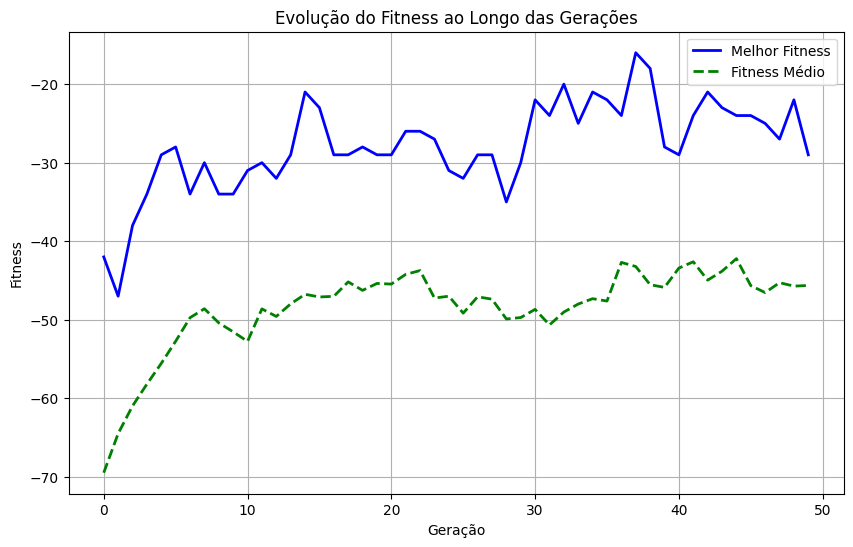

In [13]:
import random
import matplotlib.pyplot as plt

# Função de Seleção - Torneio
def selection(population, fitness_scores, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitness_scores)), tournament_size)
        best_individual = max(tournament, key=lambda x: x[1])
        selected.append(best_individual[0])
    return selected

# Função de Crossover - Cruzamento de Dois Pontos
def crossover(parent1, parent2):
    size = len(parent1)
    point1, point2 = sorted(random.sample(range(size), 2))
    child = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    return child

# Função de Mutação - Mutação Aleatória
def mutate(individual, mutation_rate=0.1):
    new_individual = individual.copy()
    for i in range(len(new_individual)):
        if random.random() < mutation_rate:
            new_individual[i] = [
                random.randint(0, num_classes - 1),
                random.randint(0, num_teachers - 1),
                random.randint(0, num_rooms - 1),
                random.randint(0, num_periods - 1)
            ]
    return new_individual

# Evoluindo a população
def evolve_population(population, fitness_scores, mutation_rate=0.1):
    selected_population = selection(population, fitness_scores)
    new_population = []
    for i in range(0, len(selected_population), 2):
        if i + 1 < len(selected_population):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.extend([child1, child2])
    mutated_population = [mutate(individual, mutation_rate) for individual in new_population]
    return mutated_population

# Parâmetros da evolução
num_generations = 50
mutation_rate = 0.1

# Evoluindo a população e armazenando resultados
current_population = population
best_fitness_history = []
avg_fitness_history = []

for generation in range(num_generations):
    # Calculando os fitness dos indivíduos
    fitness_scores = [calculate_fitness(individual, requirements_matrix) for individual in current_population]

    # Armazenando o melhor e a média dos fitness
    best_fitness = max(fitness_scores)
    avg_fitness = sum(fitness_scores) / len(fitness_scores)
    best_fitness_history.append(best_fitness)
    avg_fitness_history.append(avg_fitness)

    # Imprimindo a melhor pontuação da geração atual
    print(f"Geração {generation + 1} - Melhor Fitness: {best_fitness} - Fitness Médio: {avg_fitness}")

    # Evoluindo para a próxima geração
    current_population = evolve_population(current_population, fitness_scores, mutation_rate)

# Visualizando a evolução do Fitness
plt.figure(figsize=(10, 6))
plt.plot(range(num_generations), best_fitness_history, label='Melhor Fitness', color='b', linewidth=2)
plt.plot(range(num_generations), avg_fitness_history, label='Fitness Médio', color='g', linestyle='--', linewidth=2)
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Evolução do Fitness ao Longo das Gerações')
plt.legend()
plt.grid(True)
plt.show()


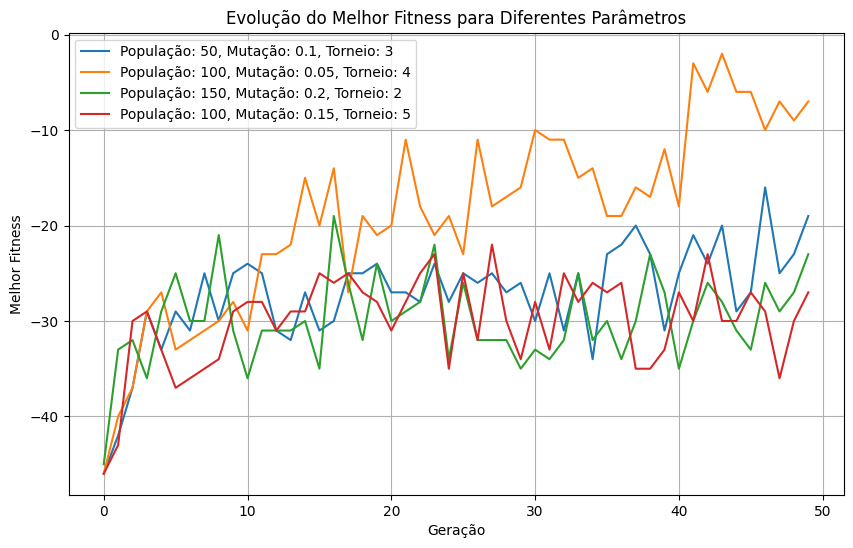

In [14]:
import matplotlib.pyplot as plt

# Função para realizar experimentos com diferentes configurações de parâmetros
def run_experiment(population_size, mutation_rate, tournament_size, num_generations=50):
    # Criação de uma população inicial aleatória
    population = [create_random_individual() for _ in range(population_size)]

    # Evoluindo a população e armazenando resultados
    current_population = population
    best_fitness_history = []

    for generation in range(num_generations):
        # Calculando os fitness dos indivíduos
        fitness_scores = [calculate_fitness(individual, requirements_matrix) for individual in current_population]

        # Armazenando o melhor fitness
        best_fitness = max(fitness_scores)
        best_fitness_history.append(best_fitness)

        # Evoluindo para a próxima geração
        current_population = evolve_population(current_population, fitness_scores, mutation_rate)

    return best_fitness_history

# Executando experimentos com diferentes valores de parâmetros
experiments = [
    {'population_size': 50, 'mutation_rate': 0.1, 'tournament_size': 3},
    {'population_size': 100, 'mutation_rate': 0.05, 'tournament_size': 4},
    {'population_size': 150, 'mutation_rate': 0.2, 'tournament_size': 2},
    {'population_size': 100, 'mutation_rate': 0.15, 'tournament_size': 5},
]

# Armazenando os resultados dos experimentos
results = []
for exp in experiments:
    result = run_experiment(exp['population_size'], exp['mutation_rate'], exp['tournament_size'])
    results.append((exp, result))

# Visualizando os resultados dos experimentos
plt.figure(figsize=(10, 6))
for exp, result in results:
    label = f"População: {exp['population_size']}, Mutação: {exp['mutation_rate']}, Torneio: {exp['tournament_size']}"
    plt.plot(range(len(result)), result, label=label)

plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução do Melhor Fitness para Diferentes Parâmetros')
plt.legend()
plt.grid(True)
plt.show()


Geração 1 - Melhor Fitness: -41 - Fitness Médio: -66.72
Geração 2 - Melhor Fitness: -41 - Fitness Médio: -63.35
Geração 3 - Melhor Fitness: -37 - Fitness Médio: -59.02
Geração 4 - Melhor Fitness: -35 - Fitness Médio: -57.29
Geração 5 - Melhor Fitness: -30 - Fitness Médio: -56.92
Geração 6 - Melhor Fitness: -25 - Fitness Médio: -55.47
Geração 7 - Melhor Fitness: -21 - Fitness Médio: -54.45
Geração 8 - Melhor Fitness: -34 - Fitness Médio: -54.91
Geração 9 - Melhor Fitness: -33 - Fitness Médio: -51.98
Geração 10 - Melhor Fitness: -30 - Fitness Médio: -51.91
Geração 11 - Melhor Fitness: -34 - Fitness Médio: -52.38
Geração 12 - Melhor Fitness: -25 - Fitness Médio: -50.08
Geração 13 - Melhor Fitness: -27 - Fitness Médio: -49.21
Geração 14 - Melhor Fitness: -28 - Fitness Médio: -51.29
Geração 15 - Melhor Fitness: -33 - Fitness Médio: -50.71
Geração 16 - Melhor Fitness: -29 - Fitness Médio: -50.4
Geração 17 - Melhor Fitness: -23 - Fitness Médio: -51.22
Geração 18 - Melhor Fitness: -22 - Fitnes

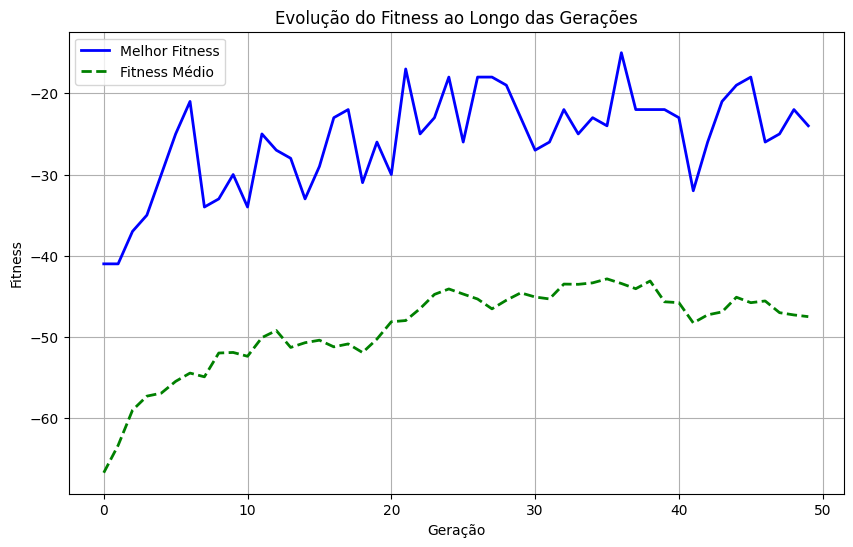


Melhor Fitness Encontrado: -15
Melhor Solução (Cronograma):
Turma: 1, Professor: 2, Sala: 1, Período: 9
Turma: 0, Professor: 3, Sala: 3, Período: 1
Turma: 0, Professor: 1, Sala: 0, Período: 8
Turma: 3, Professor: 1, Sala: 2, Período: 7
Turma: 2, Professor: 3, Sala: 0, Período: 2
Turma: 3, Professor: 0, Sala: 3, Período: 7
Turma: 2, Professor: 3, Sala: 3, Período: 3
Turma: 3, Professor: 2, Sala: 2, Período: 3
Turma: 2, Professor: 2, Sala: 3, Período: 1
Turma: 1, Professor: 2, Sala: 2, Período: 8
Turma: 3, Professor: 3, Sala: 0, Período: 3
Turma: 0, Professor: 1, Sala: 0, Período: 5
Turma: 0, Professor: 3, Sala: 0, Período: 0
Turma: 0, Professor: 0, Sala: 3, Período: 5
Turma: 0, Professor: 0, Sala: 0, Período: 5
Turma: 2, Professor: 1, Sala: 1, Período: 0
Turma: 1, Professor: 2, Sala: 1, Período: 1
Turma: 2, Professor: 3, Sala: 1, Período: 7
Turma: 0, Professor: 2, Sala: 0, Período: 4
Turma: 2, Professor: 0, Sala: 2, Período: 4
Turma: 2, Professor: 0, Sala: 1, Período: 2
Turma: 1, Profe

In [15]:
import random
import matplotlib.pyplot as plt

# Evoluindo a população e armazenando o melhor resultado
def evolve_population_and_get_best(population, num_generations=50, mutation_rate=0.1, tournament_size=3):
    current_population = population
    best_fitness_history = []
    avg_fitness_history = []

    # Inicializando as variáveis para armazenar o melhor indivíduo
    best_individual = None
    best_fitness_ever = float('-inf')

    for generation in range(num_generations):
        # Calculando os fitness dos indivíduos
        fitness_scores = [calculate_fitness(individual, requirements_matrix) for individual in current_population]

        # Encontrando o melhor indivíduo da geração atual
        best_fitness = max(fitness_scores)
        avg_fitness = sum(fitness_scores) / len(fitness_scores)
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)

        if best_fitness > best_fitness_ever:
            best_fitness_ever = best_fitness
            best_individual = current_population[fitness_scores.index(best_fitness)]

        # Imprimindo a melhor pontuação da geração atual
        print(f"Geração {generation + 1} - Melhor Fitness: {best_fitness} - Fitness Médio: {avg_fitness}")

        # Evoluindo para a próxima geração
        current_population = evolve_population(current_population, fitness_scores, mutation_rate)

    # Retornando o histórico do melhor fitness e o melhor indivíduo encontrado
    return best_fitness_history, avg_fitness_history, best_individual, best_fitness_ever

# Parâmetros da evolução
population_size = 100
num_generations = 50
mutation_rate = 0.1

# Criação de uma população inicial aleatória
population = [create_random_individual() for _ in range(population_size)]

# Evoluindo a população e obtendo o melhor resultado
best_fitness_history, avg_fitness_history, best_individual, best_fitness_ever = evolve_population_and_get_best(
    population, num_generations, mutation_rate
)

# Visualizando a evolução do Fitness
plt.figure(figsize=(10, 6))
plt.plot(range(num_generations), best_fitness_history, label='Melhor Fitness', color='b', linewidth=2)
plt.plot(range(num_generations), avg_fitness_history, label='Fitness Médio', color='g', linestyle='--', linewidth=2)
plt.xlabel('Geração')
plt.ylabel('Fitness')
plt.title('Evolução do Fitness ao Longo das Gerações')
plt.legend()
plt.grid(True)
plt.show()

# Mostrando o Melhor Resultado Encontrado
print("\nMelhor Fitness Encontrado:", best_fitness_ever)
print("Melhor Solução (Cronograma):")
for allocation in best_individual:
    turma, professor, sala, periodo = allocation
    print(f"Turma: {turma}, Professor: {professor}, Sala: {sala}, Período: {periodo}")
